# Lekcja 6. Numeryczne całkowanie i różniczkowanie

Numeryczne całkowanie polega na przybliżonym obliczeniu całki oznaczonej w zadanym przedziale. W literaturze często stosuje się termin `kwadratura` (lub czasem `kubatura` na obliczanie całek dwu- i wielowymiarowych).

Całkę liczymy dzieląc zakres całkowania na $n$ równych przedziałów, obliczając przybliżoną całkę w każdym przedziale i wreszcie przesumowaniu obliczonych całek. Główne różnice w podstawowych metodach całkowania tkwią w sposobie przybliżenia całek w tych przedziałach.

## Metoda prostokątów

Najprostszą jest metoda prostokątów, polegająca na przybliżeniu całki w elementarnym przedziale iloczynem szerokości przedziału i wartości funkcji w pewnym punkcie przedziału (czyli polem prostokąta - stąd nazwa). Jeśli wybieramy wartość początku przedziału, to mówimy o metodzie lewych prostokątów. Jeśli koniec przedziału, to o metodzie prawych prostokątów. Najlepsze przybliżenie daje metoda średnich prostokątów, gdzie jako wysokość prostokąta wybieramy wartość funkcji dla punktu środkowego przedziału. Metodę tą możemy schematycznie przedstawić na rysunku:

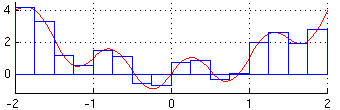

Zaimplementujmy ją: 

In [6]:
def integrate(f, a, b, n):
  dx = (b - a) / n
  integr = 0
  for i in range(n):
    x = (i+0.5) * dx + a
    integr += dx * f(x)
  return integr

def f(x):
  return x**2-1

print(integrate(f, 0, 2, 10000))

0.666666659999998


Jak widzimy, metoda ta jest niezbyt dokładna, nawet dla dużej liczby przedziałów (i powtórzeń pętli) wartość jest niedoszacowana (dla podanej funkcji i zakresu wartość dokładna to $\frac{2}{3}\approx 0.6666667$

## Metoda trapezów

Lepsze przybliżenie daje metoda trapezów, w której obliczamy wartości na obu końcach każdego przedziału a następnie aproksymujemy całkowaną funkcję odcinkiem łączącym obie wartości. Otrzymana figura jest trapezem. Schemat działania przedstawiono na poniższym rysunku:

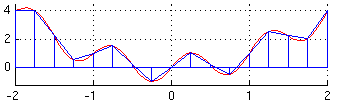

Pakiet `numpy` ma wbudowaną funkcję funkcję `trapz`, służącą do całkowania tą metodą. Składnia polecenia jest następująca: `numpy.trapz(y, x=None, dx=1.0, axis=- 1)`, gdzie `y` jest tablicą (`array`) wartości funkcji w przedziale całkowania, `x` - tablicą argumentów odpowiadających tym wartościom. Zamiast tablicy `x` możemy podać parametr `dx` - odstęp pomiędzy kolejnymi argumentami (czyli szerokość elementarnego przedziały całkowania). Jeśli nie podamy `x` ani `dx`, to przyjmowana jest wartość domyślna `dx=1`. Ostatni opcjonalny argument to oś - kierunek całkowania w przypadku funkcji wielowymiarowych. 

Przetestujmy działanie na przykładzie:

In [7]:
import numpy as np

def f(x):
  return x**2-1

x=np.linspace(0,2,10000)
print(np.trapz(f(x),x))

0.666666680002667


Funkcja `trapz` ma swojego bliźniaka w pakiecie `scipy`. Identyczną funkcjonalność (i składnię) zapewnia funkcja `scipy.integrate.trapezoid(y, x=None, dx=1.0, axis=- 1)`.

## Metoda Simpsona (parabol)

Kolejna metoda wymaga podziału zakresu całkowania na parzystą liczbę przedziałów. Następnie na każdych dwóch sąsiadujących przedziałach (a więc na trzech sąsiadujących wartościach funkcji) dokonujemy interpolacji kwadratowej (interpolacji Langrange'a stopnia drugiego). Mówiąc prościej - przybliżamy wartości funkcji pomiędzy trzema punktami parabolą przechodzącą przez te punkty. Ponownie zilustrujmy to na rysunku:

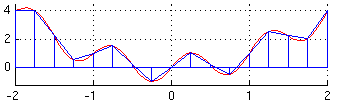

Gotową funkcję całkującą metodą Simpsona znajdziemy w pakiecie `scipy`. Jej składnia i sposób użycia są identyczne z poprzednio poznanymi: `scipy.integrate.simps(y, x=None, dx=1.0, axis=- 1, even='avg')`. Jedyna różnica to ostatni argument `even`, który może przyjmować trzy wartości: `first`, `last` lub `avg`. Argument ten (zgodnie ze swoją nazwą) reguluje zachowanie algorytmu przy nieparzystej liczbie przedziałów (czyli parzystej liczbie wartości wektora `y`). `even=first` używa metody Simpsona dla pierwszych $n-2$ przedziałów oraz metody trapezów dla ostatniego. `even=last` używa metody trapezów dla pierwszego przedziału i metody Simpsona dla pozostałych. Wreszcie `even=avg` (wartość domyślna) używa średniej arytmetycznej z obu wariantów. 
> Uwaga! W nowszych wersjach pakietu `scipy` funkcja `integrate.simps()` została zastąpiona przez `integrate.simpson()`.

Sprawdźmy działanie na przykładzie:

In [8]:
import numpy as np
from scipy import integrate

def f(x):
  return np.log10(x+1)

x=np.linspace(0,10,10000)
print(integrate.simps(f(x),x, even='first'))
print(integrate.simps(f(x),x, even='last'))
print(integrate.simps(f(x),x))

7.112374717707652
7.112374717671786
7.112374717689718


## Metoda Gaussa i inne

Kwadratura Gaussa jest zaawansowaną metodą całkowania numerycznego, istotnie podnoszącą dokładność obliczeń. W metodzie tej zakres całkowania nie jest dzielony na równe odcinki, ale szerokość kroku jest zmienna. Dodatkowo w każdym węźle wartość funkcji jest mnożona przez pewną wagę. Wagi oraz punkty węzłowe są wybierane w taki sposób, aby funkcja interpolowana najlepiej oddawała funkcję całkowaną. Moduł `scipy.integrate` dostarcza kilka funkcji całkujących różnymi wariantami tej metody. Dostępne są m.in.:
* `scipy.integrate.quadrature()` - całkowanie adaptacyjną metodą Gaussa z ustaloną tolerancją
* `scipy.integrate.fixed_quad()` - całkowanie metodą Gaussa ustalonego rzędu
* `scipy.integrate.quad()` - całkowanie metodą pochodzącą z biblioteki QUADPACK języka Fortran
* `scipy.integrate.newton_cotes()` - zwraca wagi i współczynnik błędu dla metody Newtona-Cotesa.

Jak widać, możliwości numerycznego całkowania z pakietem `scipy` są bardzo rozbudowane, dlatego dostępna jest też osobna funkcja wyjaśniająca dodatkowe parametry funkcji `quad()`: 

In [1]:
from scipy import integrate
integrate.quad_explain()


    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
        In the call forms with ``xx``,  ``n`` is the length of the ``xx``
        array which contains ``xx[0] == x`` and the rest of the items are
        numbers contained in the ``ar

## Całkowanie i różniczkowanie wielomianów

W poprzedniej lekcji poznaliśmy metody `np.roots()` i `np.poly()` obliczające odpowiednio pierwiastki i współczynniki wielomianu. Pakiet `numpy` dostarcza również funkcji pozwalających łatwo całkować i różniczkować wielomiany. Do obliczania całek służy polecenie `polyint` o składni `numpy.polyint(p, m=1, k=None)`, gdzie `p` jest tablicą współczynników, `m` oznacza rząd całki (domyślnie $1$) a `k` to wyraz wolny (domyślnie $0$). 

Obliczmy całkę wielomianu $w(x)=4x^3-6x^2+8x-1$ zakładając, że $C=0.5$:

In [ ]:
import numpy as np

w=np.array([4, -6,8,-1])
print(np.polyint(w,k=0.5))

[ 1.  -2.   4.  -1.   0.5]


Jak widzimy, rezultatem jest $\int w(x)=x^4-2x^3+4x^2-x+0.5$

Analogicznie możemy obliczać pochodne wielomianów z użyciem funkcji `numpy.polyder(p, m=1)`. Podobnie jak w poprzednim przykładzie, `p` jest sekwencją współczynników a `p` opcjonalnym rzędem pochodnej (domyślnie $1$).

In [ ]:
import numpy as np

W=np.array([1, -2, 4, -1, 0.5])
print(np.polyder(W))

[ 4. -6.  8. -1.]


Dla porządku dodajmy, że istnieją również funkcje `polyadd`, `polysub`, `polymul`, and `polydiv`, relizujące operacje arytmetyczne na wielomianach, a także funkcja `polyval` obliczająca wartość wielomianu w zadanym punkcie:

In [ ]:
import numpy as np

w = np.array([1, -2, 4, -1, 0.5])
v = np.array([-2, 3, 10])

print(np.polyval(w, 3.25))
print(np.polyadd(w, v))
print(np.polysub(w, v))
print(np.polysub(v, w))
print(np.polymul(w, v))
print(np.polydiv(w, v))

82.41015625
[ 1.  -2.   2.   2.  10.5]
[ 1.  -2.   6.  -4.  -9.5]
[-1.   2.  -6.   4.   9.5]
[-2.   7.  -4.  -6.  36.  -8.5  5. ]
(array([-0.5  ,  0.25 , -4.125]), array([ 8.875, 41.75 ]))


Zauważmy, że wynikiem dzielenia są dwa wielomiany: rezultat dzielenia i reszta z dzielenia.

# Różniczkowanie dowolnej funkcji

Różniczkowanie numeryczne w najprostszym ujęciu polega na obliczeniu różnicy wartości funkcji w dwóch punktach (końcach przedziału) i podzieleniu jej przez odległość między tymi punktami (szerokość przedziału). Jeśli punkt, w którym liczymy pochodną jest jednocześnie lewą granicą przedziału, to mówimy o wzorze różnicowym dla lewego węzła. Jeśli jest prawą granicą, to mówimy o wzorze dla prawego węzła. Jeśli obliczamy pochodną na środku przedziału, to mówimy o wzorze różnicowym dla węzła centralnego. Tę ostatnią sytuację ilustruje rysunek:
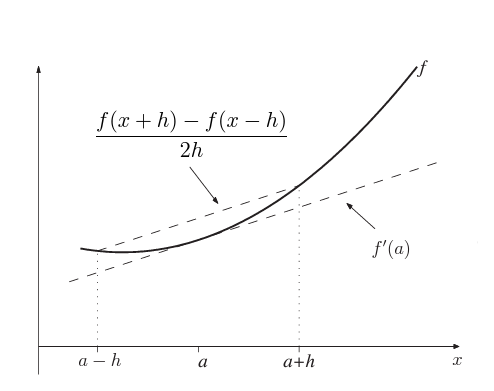

Jak widzieliśmy, pakiet `numpy` nie dostarcza wygodnych narzędzi do numerycznego różniczkowania dowolnych funkcji. Na nasze szczęście taka funkcjonalność jest dostępna w pakiecie `scipy`. Zapewnia ją funkcja  `scipy.misc.derivative(f, x0, dx=1.0, n=1, args=(), order=3)`. Obowiązkowymi argumentami są różniczkowana funkcja i punkt, w którym chcemy obliczyć pochodną. Opcjonalnie możemy podać szerokość przedziału różnicowego `dx` (domyślnie $1$), rząd pochodnej `n` (domyślnie $1$), liczbę węzłów `order` (musi być nieparzysta, domyślnie $3$) oraz krotkę dodatkowych argumentów. Funkcja oblicza pochodną w węźle centralnym. Sprawdźmy działanie na przykładzie:

In [3]:
from scipy import misc
from math import sin, pi

def f(x):
  return sin(x)
print(misc.derivative(f, 0, 0.0001))
print(misc.derivative(f, pi/2, 0.1))
print(misc.derivative(f, pi, 0.01))

0.9999999983333334
0.0
-0.9999833334166451


## Wielomiany ponownie

W `numpy` od wersji $1.4$ pojawiła się nowa klasa numpy.polynomial, na nowo definiująca wielomiany. Wprowadza ona bardziej spójny interfejs a także pozwala na operacje arytmetyczne z użyciem standardowych operatorów `+`, `-`, `*` i `/`. Prześledźmy działanie:

In [ ]:
from numpy.polynomial import Polynomial

w = Polynomial([2, 3, -2, 4])
v = Polynomial([0, 1, 3])
print(w)
print(type(w))
w

poly([ 2.  3. -2.  4.])
<class 'numpy.polynomial.polynomial.Polynomial'>


Polynomial([ 2.,  3., -2.,  4.], domain=[-1,  1], window=[-1,  1])

In [ ]:
v

Polynomial([0., 1., 3.], domain=[-1,  1], window=[-1,  1])

In [ ]:
w+v

Polynomial([2., 4., 1., 4.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
w.deriv()

Polynomial([ 3., -4., 12.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
v.integ(k=10)

Polynomial([10. ,  0. ,  0.5,  1. ], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
w(2)

32.0

## Literatura

Jak wielokrotnie wspomniano, powyższe to jedynie krótkie wprowadzenie do najbardziej podstawowej tematyki obliczeń numerycznych. Zainteresowanego czytelnika odsyłamy do literatury przedmiotu. Szczególnie polecamy następujące pozycje:
1. Hans Petter Langtangen, *Primer on Scientific Programming with Python*, Springer; 4th edition (August 2, 2014)
1. Christian Hill, *Learning Scientific Programming with Python*, Cambridge University Press; 2nd edition (November 12, 2020)

Dostępne są także niezliczone bezpłatne internetowe samouczki, przykłady, demonstracje oraz całe kursy i podręczniki. 

